# DoF on Edges in Two Dimensions

We describe general idea of the data structures generated in subroutine 
`dofedge` for two dimensional triangular grids. We refer to [Simplicial Complex in Two Dimensions](../mesh/sc.html) for the discussion of ordering and orientation of edges.

`[elem2edge,edge,elem2edgeSign,edgeSign] = dofedge(elem)` constructs data structure for finite elements associated to edges including CR nonconforming element, Ravairt-Thomas element, and Nedelec element etc.
 
In the output

-`elem2edge`: the elementwise pointer from `elem` to `edge`. In each triangle, the opposite indexing is used for its three edges, e.g., `elem2edge(t,1)` is the global index of the first edge consisting of vertices `[2 3]` of triangle `t`.
 
-`edge`: the edge matrix is sorted s.t. `edge(:,1)<edge(:,2)`. The orientation of edge is induced by the ascend ordering of vertices.
 
-`elem2edgeSign`: records the consistency of the local edge `locEdge = [2 3; 3 1; 1 2]` and the global edge orientation. 

  `elem2edgeSign = -1` if the local edge orientation is inconsistent with the global one, i.e. `elem(:,locEdge(:,1)) > elem(:,locEdge(:,2))`. 
  
  When both `elem` and local edges are ascend ordered (i.e. `locEdge = [2 3; 1 3; 1 2]` and `elem(:,1)<elem(:,2)<elem(:,3)` ), `elem2edgeSign = [1 1 1]`. In this case, no need to use `elem2edgeSign`. 
  
  When `elem` is the ascend ordering and `locEdge = [2 3; 3 1; 1 2]` is the induced ordering, then `elem2edgeSign = [1 -1 1]`, i.e., only the 2nd edge `[3 1]` is inconsistent. In this case, the pattern is also known and no need to call `dofedge`.
 
-`edgeSign`: As the lcoal edge is the induced ordering, one interior edge will be shared by two triangles with opposite orientation. `edgeSign = 1` if the edge is consistent with the local edge of its first element, equals `-1` otherwise. 

See also `dof3edge`, `dof3face`

## Example


elem =

     4     5     1
     5     6     2
     7     8     4
     8     9     5
     2     1     5
     3     2     6
     5     4     8
     6     5     9


elem2edge =

  8�3 uint32 matrix

    3    2    8
    6    5   11
   10    9   15
   13   12   16
    3    5    1
    6    7    4
   10   12    8
   13   14   11


edge =

  16�2 uint32 matrix

   1   2
   1   4
   1   5
   2   3
   2   5
   2   6
   3   6
   4   5
   4   7
   4   8
   5   6
   5   8
   5   9
   6   9
   7   8
   8   9



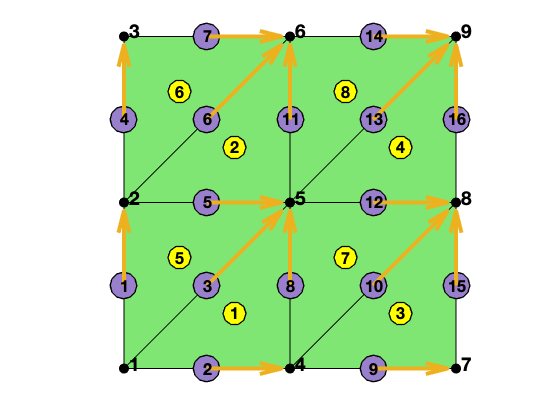

In [1]:
% Generate edge and elem2dof
[node,elem] = squaremesh([0,1,0,1],1/2);
T = auxstructure(elem);
elem2edge = T.elem2edge;
edge = T.edge;
edge2elem = T.edge2elem;

showmesh(node,elem);
findnode(node,'all');
findelem(node,elem,'all');
findedge(node,edge,'all','vec');

display(elem);
display(elem2edge);
display(edge);

In [5]:
NT = size(elem,1); NE = size(edge,1);
elem2edgeSign = ones(NT,3);
totalEdge = uint32([elem(:,[2,3]); elem(:,[3,1]); elem(:,[1,2])]);
idx = (totalEdge(:,1)>totalEdge(:,2));
elem2edgeSign(idx) = -1;

display(elem2edgeSign);


elem2edgeSign =

    -1     1     1
    -1     1     1
    -1     1     1
    -1     1     1
     1    -1    -1
     1    -1    -1
     1    -1    -1
     1    -1    -1

